<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_KNN_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://aims-senegal.org/wp-content/uploads/sites/2/2020/10/aims_senegal.jpg' /></a>

This tutorial is inspired by [Assignment 1](https://web.eecs.umich.edu/~justincj/teaching/eecs498/FA2020/assignment1.html) from the "Deep Learning for Computer Vision EECS 498-007 / 598-005" Course (University of Michigan).



# KNN:

**K** **N**earest **N**eighbors algorithm is a non-parametric supervised learning method that is used to solve classification and regression tasks.

---

The KNN algorithm output is calculated based on the k closest training examples.

---

In classification: the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its K nearest neighbors (K is a positive integer, typically small). If K = 1, then the object is simply assigned to the class of that single nearest neighbor.

---

In regression: the output is a continous value for the object. This value is the average of the values of k nearest neighbors.

---


# KNN Classifier:

<img src='https://miro.medium.com/max/1400/0*34SajbTO2C5Lvigs.png' />

In KNN a commonly used distance function for continuous variables is **Euclidean distance**. For discrete variables, such as for text classification, another metric can be used, such as the **Hamming distance**.



---



#KNN and decsion boundaries

<img src='https://i.stack.imgur.com/jz0hd.jpg' />

**In this tutorial we will build a KNN based Classfier for the images of CIFAR-10**

[CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is a widely used dataset in ML practice. It consists of 50000 train images and 10000 test images spanning 10 classes.

The classes are: 'plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'

We will be using pytorch in this tutorial to load the dataset (don't worry about this for now).

# Download CIFAR10 dataset:

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [6]:

transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000,
                                          shuffle=True, num_workers=2)
x_train, y_train = next(iter(trainloader))

testloader = torch.utils.data.DataLoader(testset, batch_size=10000,
                                          shuffle=True, num_workers=2)
x_test, y_test = next(iter(testloader))

**In this tutorial we will only use 1000 train samples and 100 test samples**

In [8]:
x_train = x_train[:1000]
y_train = y_train[:1000]

x_test = x_test[:100]
y_test = y_test[:100]

In [9]:
x_train.shape, y_train.shape

(torch.Size([1000, 3, 32, 32]), torch.Size([1000]))

In [10]:
x_test.shape, y_test.shape

(torch.Size([100, 3, 32, 32]), torch.Size([100]))

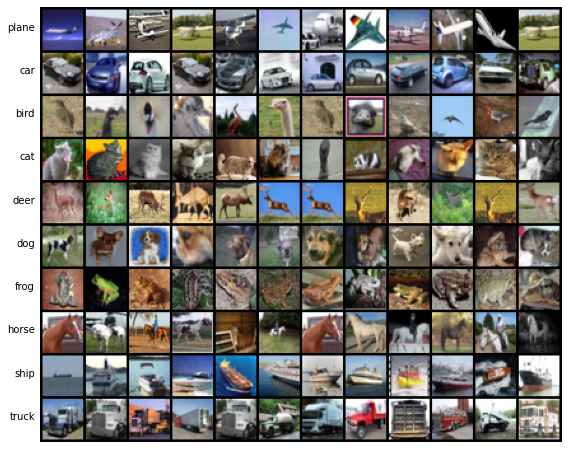

In [11]:
import random
from torchvision.utils import make_grid
fig = plt.gcf()
fig.set_size_inches(15, 8)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
samples_per_class = 12
samples = []
for y, cls in enumerate(classes):
  plt.text(-4, 34 * y + 18, cls, ha='right')
  idxs = (y_train == y).nonzero().view(-1)
  for i in range(samples_per_class):
    idx = idxs[random.randrange(idxs.shape[0])].item()
    samples.append(x_train[idx])
img = torchvision.utils.make_grid(samples, nrow=samples_per_class)
plt.imshow(transforms.ToPILImage()(img))
plt.axis('off')
plt.show()

In [12]:
# Flatten the data
x_train = x_train.reshape(x_train.shape[0], -1).numpy()
y_train = y_train.numpy()

In [13]:
x_train.shape, y_train.shape

((1000, 3072), (1000,))

In [14]:
x_test = x_test.reshape(x_test.shape[0], -1).numpy()
y_test = y_test.numpy()
x_test.shape,y_test.shape

((100, 3072), (100,))

# Two Loops KNN Implementaion

In [15]:
def KNN_two_loops(x_train, x_test):
  
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  dist = np.zeros((num_train, num_test))

  for i in range(num_test):
    for j in range(num_train):
      dist[j, i]= np.sqrt(np.sum((x_test[i]-x_train[j])**2))
  return dist

#KNN Vectorized Implementation(No Loop)

In [16]:

def KNN(X_train, X_test):
  
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    dist = np.zeros((num_train, num_test))

    dist = np.sqrt(np.sum(np.square(X_test[:,np.newaxis,:] - X_train[np.newaxis,:,:]), axis=2))
    dist=dist.T 

    return dist

    

In [17]:
dist = KNN(x_train, x_test)
dist

dist2 = KNN_two_loops(x_train, x_test)
dist2

print(dist.shape, dist2.shape)

(1000, 100) (1000, 100)


In [20]:
dist

array([[13.756427, 19.724035, 15.758943, ..., 26.1134  , 16.765104,
        14.329538],
       [11.207497, 17.67875 , 13.567092, ..., 22.606749, 12.594451,
        15.513584],
       [18.579294, 17.40028 , 18.581707, ..., 27.619602, 16.876133,
        19.4508  ],
       ...,
       [12.637812, 20.558056, 17.493921, ..., 26.797373, 15.552432,
        17.887842],
       [18.038828, 22.148907, 17.149733, ..., 20.999598, 18.602106,
        16.616343],
       [16.069677, 11.321102, 16.872328, ..., 27.805841, 12.999587,
        19.71116 ]], dtype=float32)

##Test the difference in values

In [21]:
torch.manual_seed(0)
x_train_rand = np.random.randn(100, 3*32*32)
x_test_rand = np.random.randn(100, 3*32*32)

dists_two = KNN_two_loops(x_train_rand, x_test_rand, )
dists_none = KNN(x_train_rand, x_test_rand,)
difference = np.sqrt(np.sum(np.power((dists_two - dists_none), 2)))
print('Difference: ', difference)
if difference < 1e-4:
  print('Good! The distance matrices match')
else:
  print('Uh-oh! The distance matrices are different')

Difference:  0.0
Good! The distance matrices match


In [22]:
dists_two.shape

(100, 100)

In [23]:
dists_none.shape

(100, 100)

##Bonus:1-Loop Implementation

In [18]:

def KNN_one_loop(x_train, x_test):

  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  for i in range(num_test):
    dist[i,:] = np.sqrt(np.sum(np.square(x_test[i,:] - x_train), axis=1))

  return dist

In [25]:
print(dist)

[[13.756427 19.724035 15.758943 ... 26.1134   16.765104 14.329538]
 [11.207497 17.67875  13.567092 ... 22.606749 12.594451 15.513584]
 [18.579294 17.40028  18.581707 ... 27.619602 16.876133 19.4508  ]
 ...
 [12.637812 20.558056 17.493921 ... 26.797373 15.552432 17.887842]
 [18.038828 22.148907 17.149733 ... 20.999598 18.602106 16.616343]
 [16.069677 11.321102 16.872328 ... 27.805841 12.999587 19.71116 ]]


# Loops vs Vectorization: Speed Test

In [26]:
%timeit  KNN(x_train, x_test)


1 loop, best of 5: 723 ms per loop


In [27]:
%timeit  KNN_two_loops(x_train, x_test)

1 loop, best of 5: 1.4 s per loop


In [28]:
print(f'The Vectorized Inplementaion is {(1.51*1000)/724:.2f} times faster than using loops')

The Vectorized Inplementaion is 2.09 times faster than using loops


#Predict Labels

In [19]:
def predict_labels(x_test, x_train, y_train, k=1):

  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  preds=[]
  dist = KNN(x_train, x_test)

  labels=np.zeros((x_train.shape[0], 1))
  for i in range(num_train):
    labels[i]=y_train[i]
  dist=np.append(dist, labels, axis=1)

  for i in range(num_test):
    for j in range(num_train):
      dist = dist[np.argsort(dist[:, i])]

      k_vals=[]
      for m in range(k):
        k_vals.append(dist[m][num_test])
    prediction=np.bincount(k_vals).argmax()

    preds.append(prediction)

  return preds
  



In [30]:
predict_labels(x_test, x_train, y_train, k=1)

[4,
 4,
 2,
 2,
 5,
 4,
 2,
 6,
 4,
 2,
 6,
 2,
 7,
 6,
 2,
 3,
 4,
 2,
 8,
 2,
 2,
 4,
 6,
 4,
 5,
 4,
 2,
 8,
 8,
 6,
 5,
 2,
 4,
 0,
 8,
 6,
 6,
 9,
 2,
 8,
 6,
 4,
 4,
 8,
 0,
 0,
 8,
 6,
 6,
 6,
 4,
 6,
 6,
 0,
 2,
 2,
 2,
 6,
 8,
 0,
 9,
 4,
 0,
 2,
 8,
 0,
 5,
 3,
 2,
 4,
 2,
 6,
 0,
 2,
 2,
 0,
 7,
 8,
 2,
 4,
 8,
 2,
 6,
 8,
 2,
 2,
 8,
 3,
 2,
 6,
 6,
 4,
 6,
 6,
 6,
 5,
 0,
 0,
 0,
 8]

###Test your predict label method

In [ ]:
dists = torch.tensor([
    [0.3, 0.4, 0.1],
    [0.1, 0.5, 0.5],
    [0.4, 0.1, 0.2],
    [0.2, 0.2, 0.4],
    [0.5, 0.3, 0.3],
])
y_train2 = np.array([0, 1, 0, 1, 2])
y_pred_expected2 =np.array([1, 0, 0])
y_pred2 = predict_labels(dists, y_train2, k=3)
correct = y_pred2.tolist() == y_pred_expected2.tolist()
print('Correct: ', correct)

#Build complete KNN classifier 

In [20]:

def KNN(X_train, X_test):
  
    num_train = X_train.shape[0]
    num_test = X_test.shape[0]
    dist = np.zeros((num_train, num_test))

    dist = np.sqrt(np.sum(np.square(X_test[:,np.newaxis,:] - X_train[np.newaxis,:,:]), axis=2))
    dist=dist.T 

    return dist

In [21]:
def predict(x_test, x_train, y_train, k):
  num_train = x_train.shape[0]
  num_test = x_test.shape[0]
  y_test_preds=[]
  dist = KNN(x_train, x_test)

  labels=np.zeros((len(x_train), 1))
  for i in range(num_train):
    labels[i]=y_train[i]
  dist=np.append(dist, labels, axis=1)

  for i in range(num_test):
    for j in range(num_train):
      dist = dist[np.argsort(dist[:, i])]

      k_vals=[]
      for m in range(k):
        k_vals.append(dist[m][num_test])
    prediction=np.bincount(k_vals).argmax()

    y_test_preds.append(prediction)

  return y_test_preds

In [22]:
def check_accuracy(x_test, y_test):

  y_test_preds=predict(x_test, x_train, y_train, 6)
  allsum=0

  for i in range(len(y_test_preds)):
    if(y_test[i]==y_test_preds[i]):
      allsum=allsum+1
  return ("The accuracy of the classifier is: "+ str(allsum/len(y_test)*100))

In [23]:
check_accuracy(x_test, y_test)

'The accuracy of the classifier is: 26.0'

In [11]:
class KnnClassifier:
  def __init__(self, x_train, x_test, y_train, y_test, k):

    self.x_train=x_train
    self.y_train=y_train
    self.x_test=x_train
    self.y_test=y_train
    self.k=k

    #NO ACTION HERE AS KNN DOES NOT LEARN ANY MODEL

  def KNN(self):
    
    num_train = self.x_train.shape[0]
    num_test = self.x_test.shape[0]
    dist = np.zeros((num_train, num_test))

    dist = np.sqrt(np.sum(np.square(self.x_test[:,np.newaxis,:] - self.x_train[np.newaxis,:,:]), axis=2))
    dist=dist.T 

    return dist

  def predict(self):
    k=self.k
    num_train = self.x_train.shape[0]
    num_test = self.x_test.shape[0]
    y_test_preds=[]
    dist = self.KNN()

    labels=np.zeros((self.x_train.shape, 1))
    for i in range(num_train):
      labels[i]=self.y_train[i]
    dist=np.append(dist, labels, axis=1)

    for i in range(num_test):
      for j in range(num_train):
        dist = dist[np.argsort(dist[:, i])]

        k_vals=[]
        for m in range(k):
          k_vals.append(dist[m][num_test])
      prediction=np.bincount(k_vals).argmax()

      y_test_preds.append(prediction)

    return y_test_preds
    

  def check_accuracy(self):

    y_test_preds=self.predict()
    allsum=0
    for i in range(len(y_test_preds)):
      if(self.y_test[i]==y_test_preds[i]):
        allsum=allsum+1
    return (allsum/len(y_test))*100
  


###Test your accuracy on CIFAR10

In [ ]:
classifier = KnnClassifier(x_train, x_test, y_train, y_test, 5)
classifier.check_accuracy()

###Is there is any improvement between k=1 and k=5 ? if not , can we improve more?

####IWhen K=1, teh accuracy is smaller than when K= 5, and we can improve by ensuring the chosen value for K is optimally selected